# A quick introduction to Linear Regression in Python
#### Pratical Introduction to Data Science

This brief practical is intended to provide you with a starting point to experiment with some aspects of linear regression. It's also worth trying to see whether you can convert some of the content from lectures that is expressed into mathematical notation into code.

As you evaluate the cells below, try to make sure you understand what's happening at each stage. I encourage you to tweak the code to experiment with what happens if you do things slightly differently (e.g. if you swap Series with slices from DataFrames, etc.).

## Linear Regression in 2 Dimensions

We'll start by looking at the familiar 2D case (where $y$ is a function of a single variable $x$).


In [1]:
import pandas as pd #pandas to give us dataframes
import seaborn as sns #seaborn for some prettier plots
import numpy as np #used later for matrix manipulation

The file `cats.csv` should already be in your folder.

Load the data from `cats.csv` into a DataFrame called `cats`: 

In [2]:
cats=pd.read_csv("cats.csv")

In [3]:
cats.head()

,Unnamed: 0,Sex,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


The third and fourth columns in the cats table refer to body weight (Bwt) and heart weight (Hwt).
Note, the body weights are in kilograms, whereas the heart weights are in grammes.
We're going to build a model that predicts a cat's heart weight from its body weight.

First we'll look at how you can do linear regression using *scikit-learn*.

In [4]:
from sklearn.linear_model import LinearRegression

We want to plot the body weight (x-axis)...

In [5]:
cats.iloc[:,2:3]

,Bwt
0,2.0
1,2.0
2,2.0
3,2.1
4,2.1
...,...
139,3.7
140,3.8
141,3.8
142,3.9


...against the heart weight (y-weight):

In [6]:
cats.iloc[:,3:4]

,Hwt
0,7.0
1,7.4
2,9.5
3,7.2
4,7.3
...,...
139,11.0
140,14.8
141,16.8
142,14.4


(Note that we're going to pass in slices of the DataFrame, as shown above, rather than series.)

Now we'll perform a Linear Regression to find the line of best fit. We'll store our result in `reg`:

In [7]:
reg=LinearRegression().fit(cats.iloc[:,2:3],cats.iloc[:,3:4])

In [8]:
# Uncomment the line below if you want to see the error that you get if you pass in series
# reg=LinearRegression().fit(cats.iloc[:,2],cats.iloc[:,3])

In [9]:
import matplotlib.pyplot as plt # We'll use matplotlib to create some plots of the data

Here is the original data (without any regression line shown):

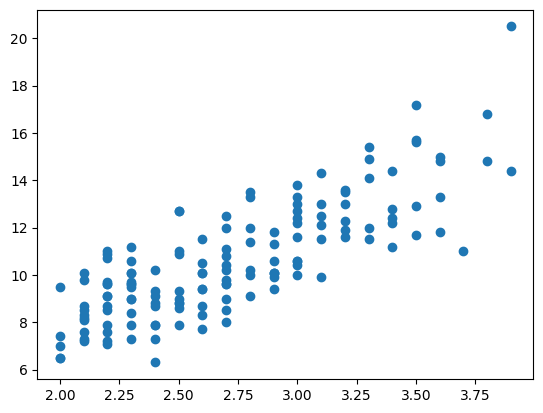

In [10]:
plt.scatter(cats.iloc[:,2],cats.iloc[:,3])

We can obtain the coefficient for the linear regression (the "slope") from the `reg` object that we obtained from doing the `fit`:

In [11]:
reg.coef_

array([[4.0340627]])

And similarly, we can get the intercept on the $y$-axis:

In [12]:
reg.intercept_

array([-0.35666243])

As a brief aside, we can also see the arguments which `fit` was originally called with, as follows:

In [13]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Let's manually get a predicted value of $y$ for each $x$ point using the normal formula for a straight line, $y=mx+c$ where $y$ corresponds to the *predicted* value for `Hwt`, $x$ is the `Bwt`, $m$ is `reg.coef_` and $c$ is `reg.intercept_`:

In [14]:
ypred=cats.iloc[:,2:3]*reg.coef_+reg.intercept_

In [15]:
ypred

,Bwt
0,7.711463
1,7.711463
2,7.711463
3,8.114869
4,8.114869
...,...
139,14.569370
140,14.972776
141,14.972776
142,15.376182


We'll know plot the original data, and superimpose the straight line that comes from `ypred`:

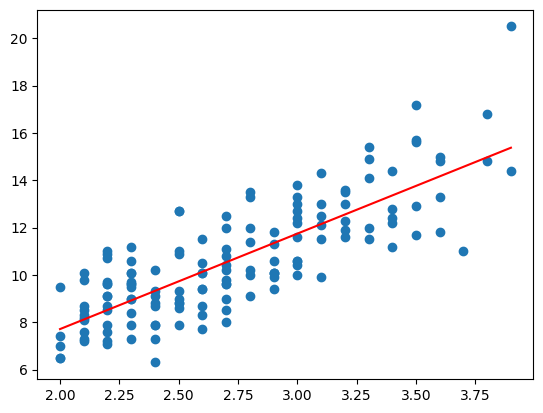

In [16]:
plt.scatter(cats.iloc[:,2:3],cats.iloc[:,3:4])
plt.plot(cats['Bwt'],ypred['Bwt'], color='red')

Instead of evaluating the formula itself, you can use the built in `predict` method:

In [17]:
ypred2=reg.predict(cats.iloc[:,2:3])
ypred2

array([[ 7.71146296],
       [ 7.71146296],
       [ 7.71146296],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.11486923],
       [ 8.5182755 ],
       [ 8.5182755 ],
       [ 8.5182755 ],
       [ 8.5182755 ],
       [ 8.5182755 ],
       [ 8.5182755 ],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 8.92168177],
       [ 9.32508804],
       [ 9.32508804],
       [ 9.32508804],
       [ 9.32508804],
       [ 9.72849431],
       [ 9.72849431],
       [10.13190058],
       [10.13190058],
       [10.13190058],
       [10.53530685],
       [10.53530685],
       [10.53530685],
       [11.34211939],
       [11.34211939],
       [11.34211939],
       [11

...which gives the same results:

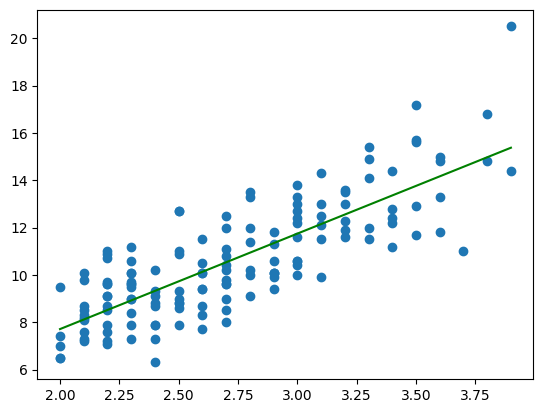

In [18]:
plt.scatter(cats.iloc[:,2:3],cats.iloc[:,3:4])
plt.plot(cats['Bwt'],ypred2, color='green')

So far, we've allowed LinearRegression.fit() to find our straight line that best fits the data. To convince yourself that what you're plotting is a straight line with the calculated slope and intercept, try changing the values of a and b below, recalcuating ymanual and replotting the graph.

In [19]:
a=4

In [20]:
b=-0.5

In [21]:
ymanual= a*cats.iloc[:,2:3]+b

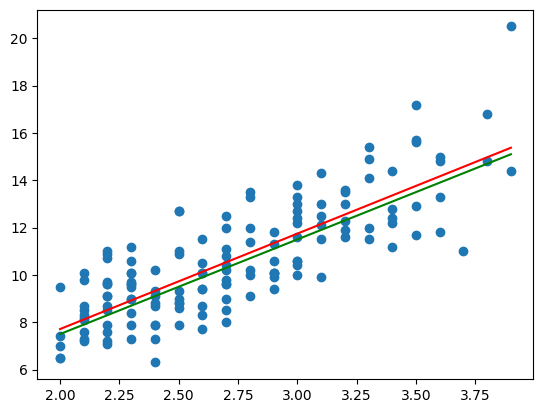

In [22]:
plt.scatter(cats.iloc[:,2:3],cats.iloc[:,3:4])
plt.plot(cats['Bwt'],ypred['Bwt'], color='red')
plt.plot(cats['Bwt'],ymanual['Bwt'], color='green')

Later on in this practical, we're going to see how you can find the values of `a` and `b` that give the best fit from first principles, instead of using `fit()` from `sklearn`.

### Calculating the Cost Function

You will remember that Linear Regression works by minimising a **cost function** based on the **Mean Squared Error**. 

The cost function is calculated repeatedly in the process of fitting (or, to use Machine Learning terminology, in learning the model).

Let's calculate the Mean Square Error here.

We're looking at a simple case here where the target variable, $y$, depends on only one variable, $x$.

Our model can be expressed as $ h_\theta(x) = \theta_0+\theta_1 x $.

The points in the dataset above can be expressed as the set $\{(x^{(i)},y^{(i)})\}$ where $i$ runs from $1$ to $m$.

In the code above the slope, $\theta_1$, is represented by the variable `a`, and the intercept, $\theta_0$, is represented by the variable `b`.

The usual expression for the cost function is as follows:

$$ J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$$

**TASK**: Write some code which calculates this quantity for the dataset above. Remember $h_\theta(x)$ is the function for the straight line. I'm not asking here for code to *minimise* this function, just to *calculate* it given your straight line (defined by your parameters $\mathbf{\theta}$) and the original data points.

**Hint:** Depending on your approach, you may need to convert a pandas dataframe to a numpy array. If you need to do this you can use `to_numpy()`.

You should get the answer `1.040045641450006`.



In [23]:
# insert your code here

As an aside, you can also calculate the mean square error using sklearn. Note that I said that cost function above was *based* on the mean squared error. The actual mean squared error does not have the factor of $2$ in the denominator. (It's often included in the cost function because in code, when you're minimising a quantity, you calculate its derivative, and the factor of two cancels out in the calculation making it more efficient).

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(cats.iloc[:,3:4],ypred)

2.080091282900012

## Some quick exploratory data analysis

We are now going to look at the public dataset *mtcars* (this is another example dataset that is included with R).  This data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-74 models).

This dataset is not built into Python, but we can download it directly via https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv .

We've already done this for you however, so you can go ahead and simply read in the `mtcars.csv` file.

In [25]:
# Import CSV mtcars
mtcars = pd.read_csv('mtcars.csv',index_col=0)

In [26]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Recall that we can view basic descriptive statistics of this dataset using the `describe` method:

In [27]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


It's often informative to visualise data like this with a scatterplot matrix.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cyl', ylabel='mpg'>,
        <Axes: xlabel='disp', ylabel='mpg'>,
        <Axes: xlabel='hp', ylabel='mpg'>,
        <Axes: xlabel='drat', ylabel='mpg'>,
        <Axes: xlabel='wt', ylabel='mpg'>,
        <Axes: xlabel='qsec', ylabel='mpg'>,
        <Axes: xlabel='vs', ylabel='mpg'>,
        <Axes: xlabel='am', ylabel='mpg'>,
        <Axes: xlabel='gear', ylabel='mpg'>,
        <Axes: xlabel='carb', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cyl'>,
        <Axes: xlabel='cyl', ylabel='cyl'>,
        <Axes: xlabel='disp', ylabel='cyl'>,
        <Axes: xlabel='hp', ylabel='cyl'>,
        <Axes: xlabel='drat', ylabel='cyl'>,
        <Axes: xlabel='wt', ylabel='cyl'>,
        <Axes: xlabel='qsec', ylabel='cyl'>,
        <Axes: xlabel='vs', ylabel='cyl'>,
        <Axes: xlabel='am', ylabel='cyl'>,
        <Axes: xlabel='gear', ylabel='cyl'>,
        <Axes: xlabel='carb', ylabel='cyl'>],
       [<Axes: xlabel='mpg',

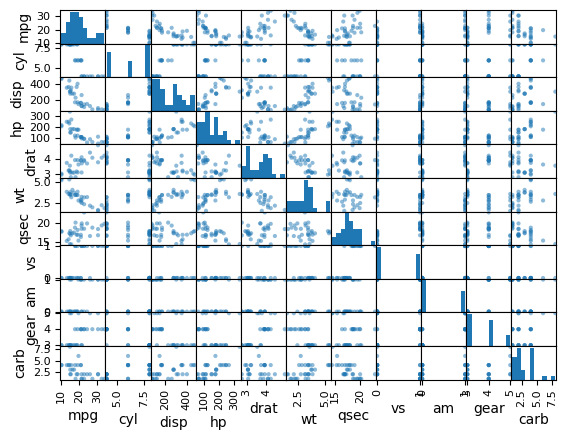

In [28]:
pd.plotting.scatter_matrix(mtcars)

Seaborn provides a version that is a bit prettier out-of-the-box:

In [29]:
import seaborn as sns

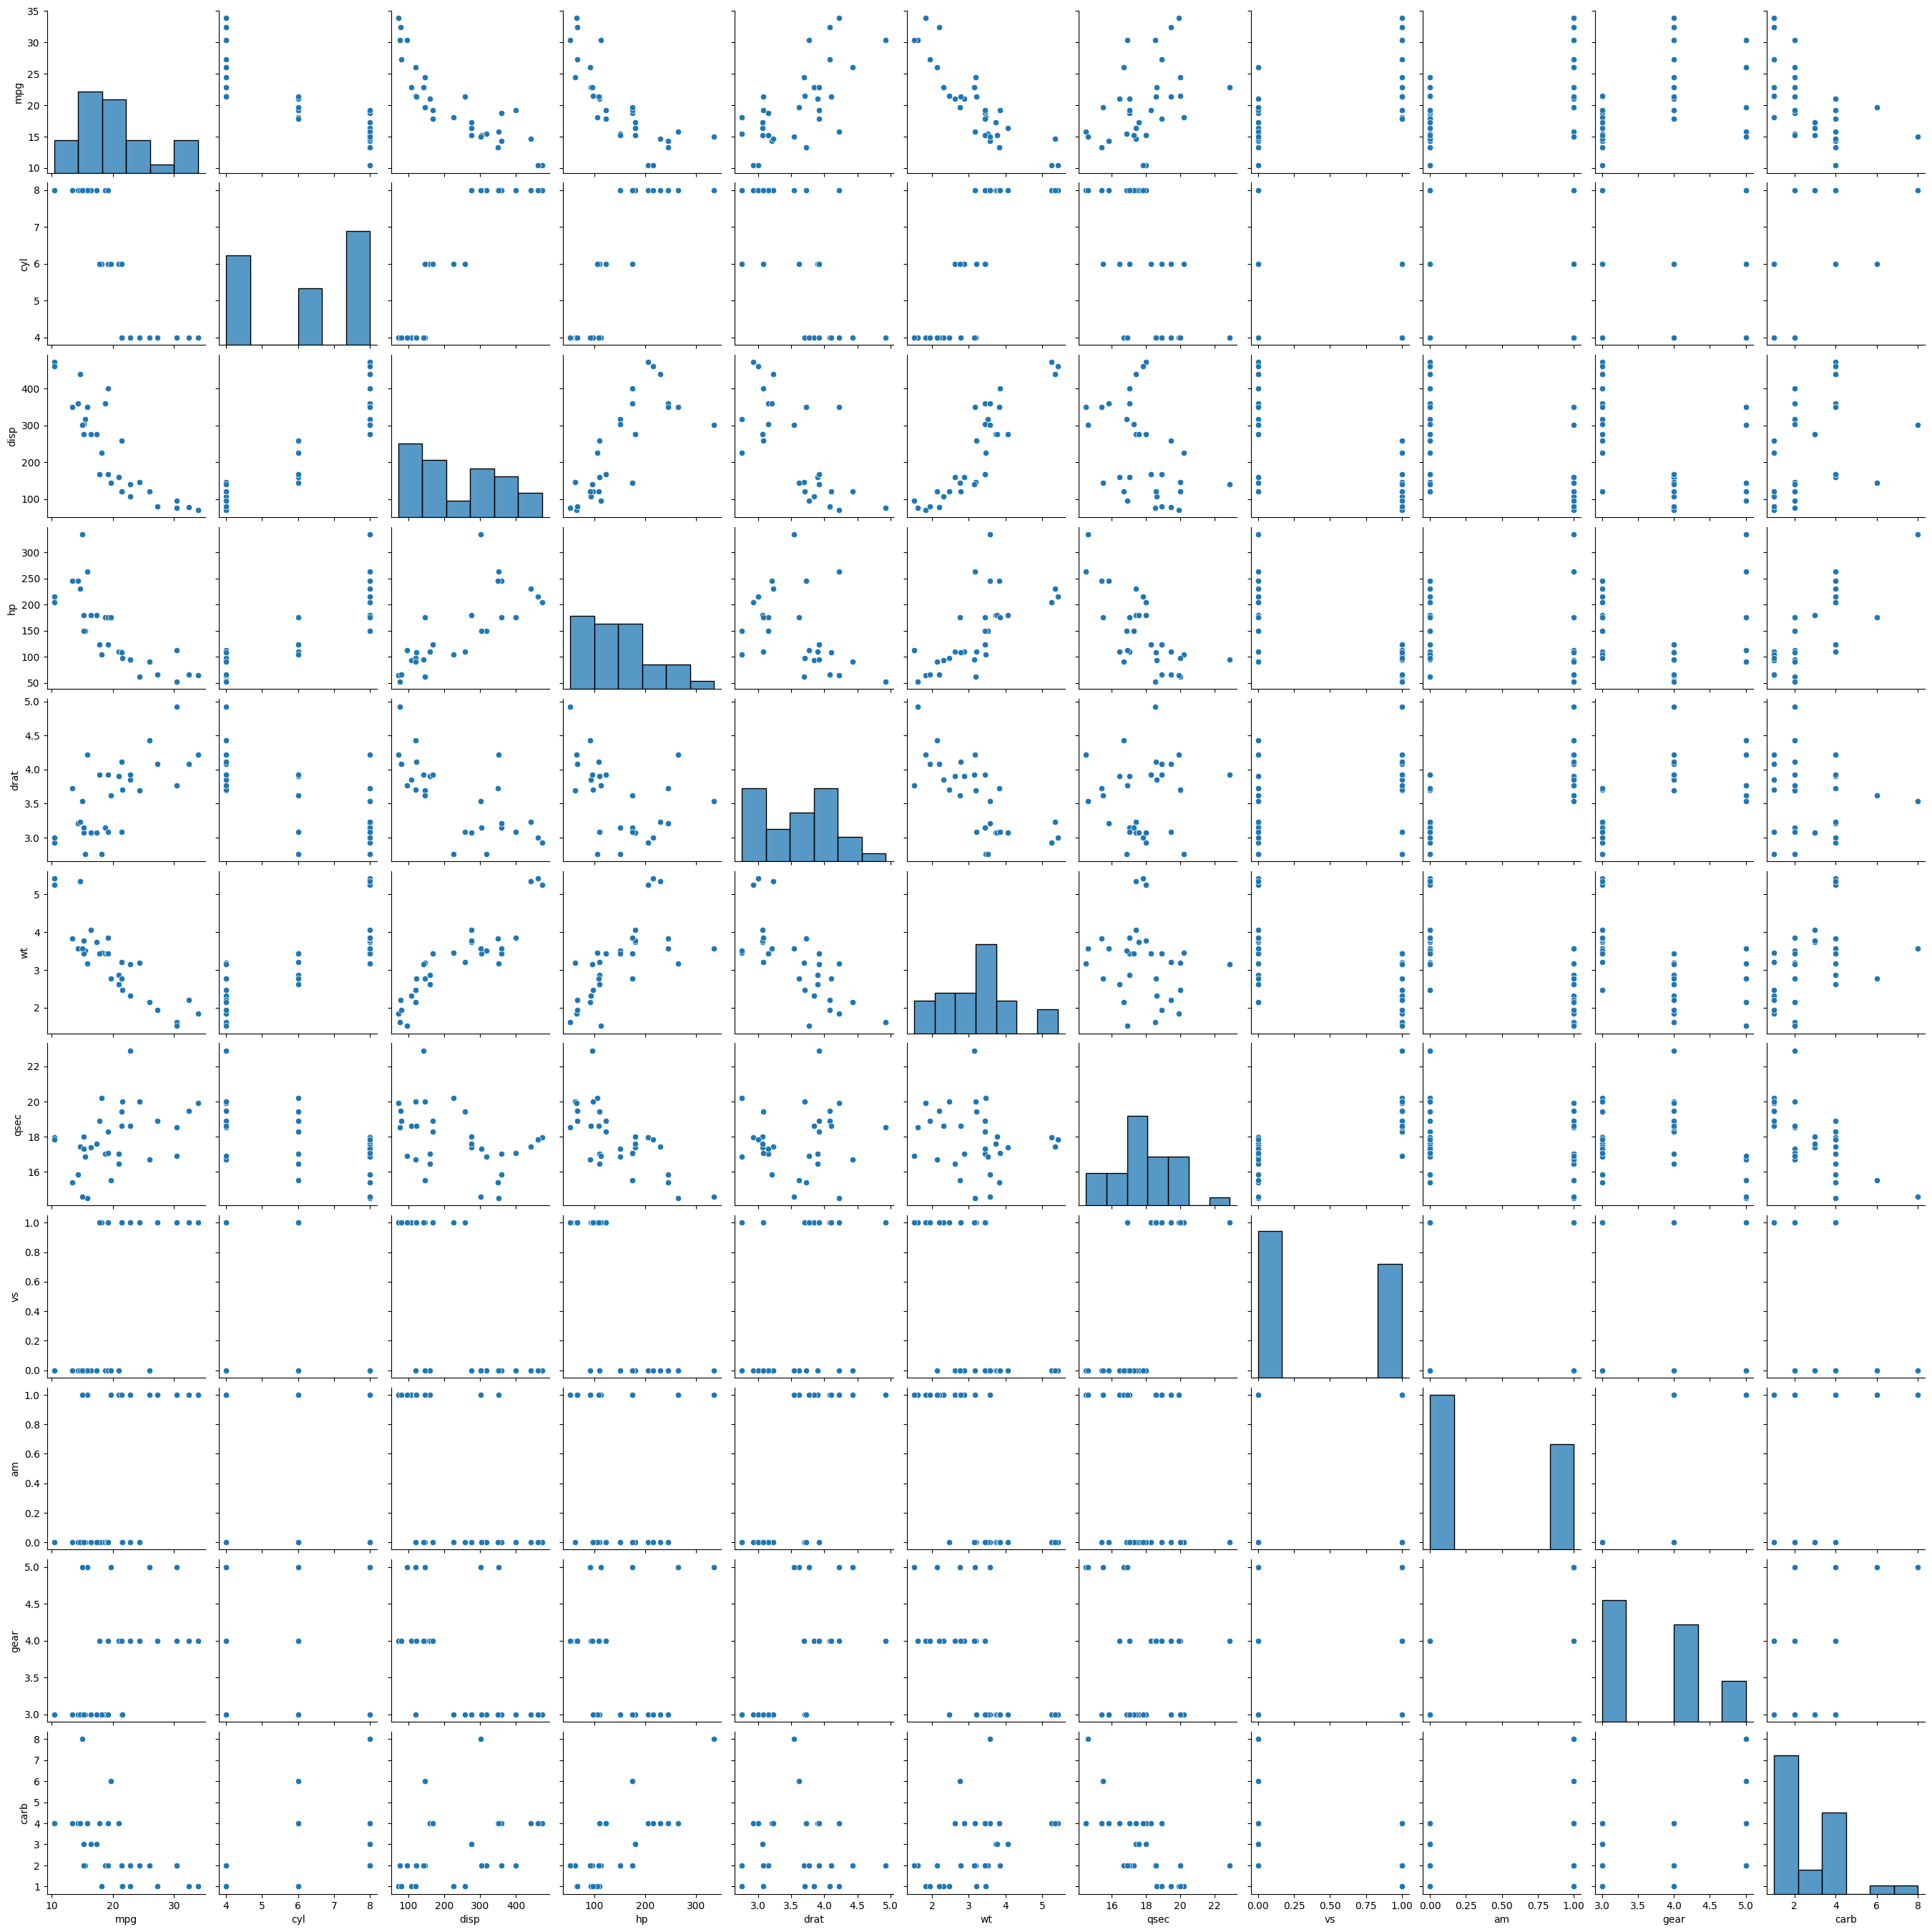

In [30]:
sns.pairplot(mtcars)

This is a great way to roughly determine if there is any linear correlation between any pair of variables. You can subset the plot to those variables that seem to have a linear correlation as follows:

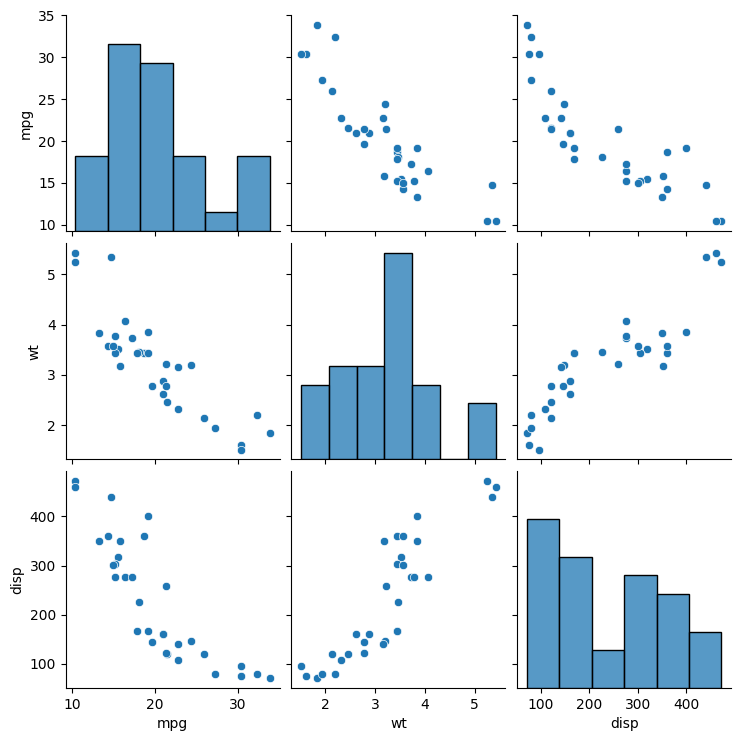

In [31]:
sns.pairplot(mtcars[['mpg','wt','disp']])

## Multiple variable linear regression

Now we will explore linear regression using more than one variable.

We'll move up from a function of *one* variable to a function of *two* variables. The technique works for any number of variables, but it gets very difficult to visualise in higher dimensions.

Whereas simple linear regression gives a model corresponding a straight **line**, linear regression with two independent variables gives a model corresponding to a flat **plane** (and in general, in higher dimensions, a so-called hyperplane). The "height" of the plane corresponds to the value of the hypothesis function which defines the model.

We're going to continue to work with the subset of the mtcars dataset that we looked at above, and in particular we will try to predict the number of miles a car can drive for each gallon of petrol (`mpg`) using the weight (`wt` in lb/1000) of the car and its engine displacement (`disp` in cu.in.).


In [35]:
from mpl_toolkits.mplot3d import Axes3D

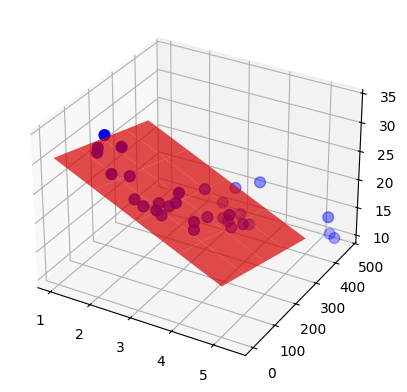

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter( mtcars['wt'], mtcars['disp'],mtcars['mpg'], c='blue', s=60)

# create a grid of values in the wt (p1) and disp (p2) directions
# to help us draw a plane
p1, p2 = np.mgrid[1:6, 0:500:100] 

a=-3.3
b=-0.015
c=34

plane= a*p1 + b*p2 + c

ax.plot_surface(p1,p2,plane,color='red',alpha=0.7)
plt.show()

As promised above, we're now going to find the optimal parameters for this model (those that give the "best fit") without using library functions. This is so that you can see how linear regression works under-the-hood. The concept of **minimising a cost function** is very important in machine learning, and you will also see it in many classification algorithms including those that use neural networks.

We will now try to use the matrix version of the normal equation (as described in lectures) to find the optimal parameters for this model. The matrix version requires two matrices X and y defined as:

$$ X =
 \begin{pmatrix}
  1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
  1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
  \vdots  & \vdots & \vdots  & \ddots & \vdots  \\
  1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)} \\
\end{pmatrix}, y = 
\begin{pmatrix}
  y^{(1)} \\
  y^{(2)} \\
  \vdots \\
  y^{(m)}
\end{pmatrix} $$

We wish the $y$ matrix to the `mpg` values that our model will predict:

In [37]:
y=mtcars['mpg']

TASK: See if you can start to build the X matrix with columns `wt` and `disp`. Your aim is to have an X matrix that looks like this:

![fig1.png](fig1.png)

In [41]:
#insert your code here

We are now ready to solve for the parameters using the equation:

$$
\mathbf{\theta}=(X^TX)^{-1}X^Ty
$$

**TASK**: Build up this equation in Python. We _could_ convert things back to NumPy at the start (and for high performance with larger data, this might be desirable) but you can do some things like the transpose with Pandas direclty. The inverse, on the other hand, is easier to do in NumPy with `np.linalg.inv()`.

Here are some hints:

1. Both dataframes and numpy arrays have a transpose method e.g. `M.transpose()`
2. Matrix multiplication can be performed with both dataframes and numpy arrays using the dot method, e.g. `A.dot(B)`

In [42]:
#insert your code here

Do the co-efficients returned correspond to a good fit when you plug them into the surface plot above?

**TASK**: Now see if you can use these coefficients to predict the mpg for the Volvo 142E using the weight and displacement figures shown above for that vehicle.

Hint:

- You can use matrix multiplication to multiply a vector containing the required values by the co-efficients matrix. Remember to include the value 1 as the first value of your 3-value vector.

The predicted value for the Volvo 142E should be 23.50057 miles per gallon.

In [43]:
#insert your code here

## Multiple variable linear regression using built in functions

We have been doing things "by hand" above to make sure you understand a little bit about how linear regression is implemented.

In practice, it's usually much more appropriate to use existing methods, and the same functions used above for single variable linear regression also work for multiple variable regression.

All the work that we have done above (and more) can be done as follows:

In [44]:
reg=LinearRegression().fit(mtcars[['wt','disp']],mtcars['mpg'])

In [45]:
reg.coef_


array([-3.35082533, -0.01772474])

In [46]:
reg.intercept_

34.96055403623728

**CHALLENGE** Look at the [documentation for `sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics). See if you can find a way to calculate the statistics provided in the following output that the *R* language provides for linear regression models.

```
> summary(model)

Call:
lm(formula = mtcars$mpg ~ mtcars$wt + mtcars$disp)

Residuals:
    Min      1Q  Median      3Q     Max
-3.4087 -2.3243 -0.7683  1.7721  6.3484

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 34.96055    2.16454  16.151 4.91e-16 ***
mtcars$wt   -3.35082    1.16413  -2.878  0.00743 **
mtcars$disp -0.01773    0.00919  -1.929  0.06362 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.917 on 29 degrees of freedom
Multiple R-squared:  0.7809,    Adjusted R-squared:  0.7658
F-statistic: 51.69 on 2 and 29 DF,  p-value: 2.744e-10

```

This is easier for some of the metrics than others. Once you have spent a bit of time trying to do this, you can look at [this answer on StackOverflow](https://stackoverflow.com/a/57239611) which shows how to calculate some of the most useful statistics.

